In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv' 
titanic=pd.read_csv(url)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Task1:1 Pie chart with male and female distribution

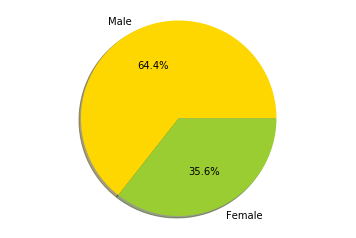

In [2]:
labels = 'Male', 'Female'
sizes = [titanic['sex'].value_counts()[0],titanic['sex'].value_counts()[1]]
colors = ['gold', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()


Task1:2 Scatter plot on Fare vs age with sex as categorical

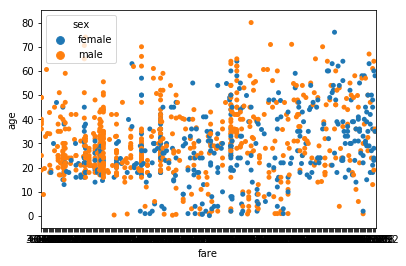

In [8]:
import seaborn as sns
sns.stripplot(titanic['fare'],titanic['age'],hue=titanic['sex'])

Task2:1 Fill missing data and change datatype of FlightNumber

In [68]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
'Budapest_PaRis', 'Brussels_londOn'], 
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']}) 

In [69]:
df['flights']=df['FlightNumber'].fillna(method='ffill')
df['FlightNumber'].fillna(df['flights']+10,inplace=True)
df.drop('flights',axis=1,inplace=True)
df['FlightNumber']=df['FlightNumber'].astype('int64')
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


Task2:2 Split From_To column and crate a temp Dataframe

In [70]:
temp=df
temp['From']=temp['From_To'].apply(lambda x:x.split('_')[0])
temp['To']=temp['From_To'].apply(lambda x:x.split('_')[-1])
temp[['From','To']]

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


Task2:3 Capitalise only the first letter

In [71]:
temp['From']=temp['From'].apply(lambda x:x.capitalize())
temp['To']=temp['To'].apply(lambda x:x.capitalize())
temp[['From','To']]

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


Task2:4 Drop From_To and add From,To in df

In [73]:
df.drop('From_To',axis=1)

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


Task2:5 Create a dataframe delays and add all those columns to dataframe df

In [74]:
df1=(pd.DataFrame(df['RecentDelays'].values.tolist(),columns=['delay1','delay2','delay3'])).join(df.drop(['RecentDelays'],axis=1))
df1

,delay1,delay2,delay3,From_To,FlightNumber,Airline,From,To
0,23.0,47.0,NaN,LoNDon_paris,10045,KLM(!),London,Paris
1,NaN,NaN,NaN,MAdrid_miLAN,10055,<Air France> (12),Madrid,Milan
2,24.0,43.0,87.0,londON_StockhOlm,10065,(British Airways. ),London,Stockholm
3,13.0,NaN,NaN,Budapest_PaRis,10075,12. Air France,Budapest,Paris
4,67.0,32.0,NaN,Brussels_londOn,10085,"""Swiss Air""",Brussels,London
